<a href="https://colab.research.google.com/github/PsorTheDoctor/Sekcja-SI/blob/master/neural_networks/RBM/digit_recognition_rbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RBM - Restricted Boltzmann Machine

### Import bibliotek

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'

import pandas as pd

### Załadowanie i przygotowanie danych

In [0]:
def gen_mnist_image(X):
  return np.rollaxis(np.rollaxis(X[:200].reshape(20, -1, 28, 28), 0, 2), 1, 3).reshape(-1, 20 * 28)

In [0]:
X_train = pd.read_csv('train.csv').values[:, 1:]
X_train = (X_train - np.min(X_train, 0)) / (np.max(X_train, 0) + 0.0001)  # normalizacja pikseli do 0-1

### Eksploracja danych

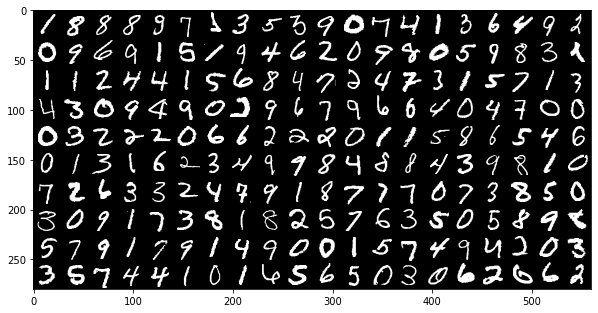

In [10]:
plt.figure(figsize=(10, 20))
plt.imshow(gen_mnist_image(X_train))

### Budowa i trenowanie modelu

In [12]:
from sklearn.neural_network import BernoulliRBM

rbm = BernoulliRBM(n_components=100, learning_rate=0.01, random_state=42, verbose=True)
rbm.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -119.40, time = 11.00s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -104.17, time = 12.22s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -96.63, time = 12.27s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -93.01, time = 12.19s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -89.73, time = 12.25s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -87.21, time = 12.27s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -85.25, time = 12.17s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -83.93, time = 12.25s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -82.52, time = 12.34s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -81.93, time = 12.32s


BernoulliRBM(batch_size=10, learning_rate=0.01, n_components=100, n_iter=10,
             random_state=42, verbose=True)

### Wyświetlenie wyników

In [0]:
def gen_pretrained_image(samples):
  xx = X_train[:40].copy()
  for j in range(epochs):
    for n in range(40):
      xx[n] = rbm.gibbs(xx[n])
  return xx

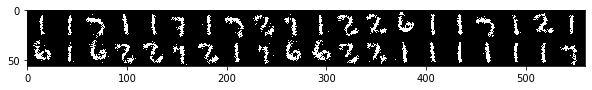

In [18]:
xx = gen_pretrained_image(1000)

plt.figure(figsize=(10, 20))
plt.imshow(gen_mnist_image(xx))

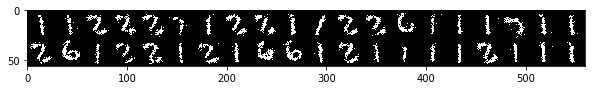

In [15]:
xx = gen_pretrained_image(10000)

plt.figure(figsize=(10, 20))
plt.imshow(gen_mnist_image(xx))

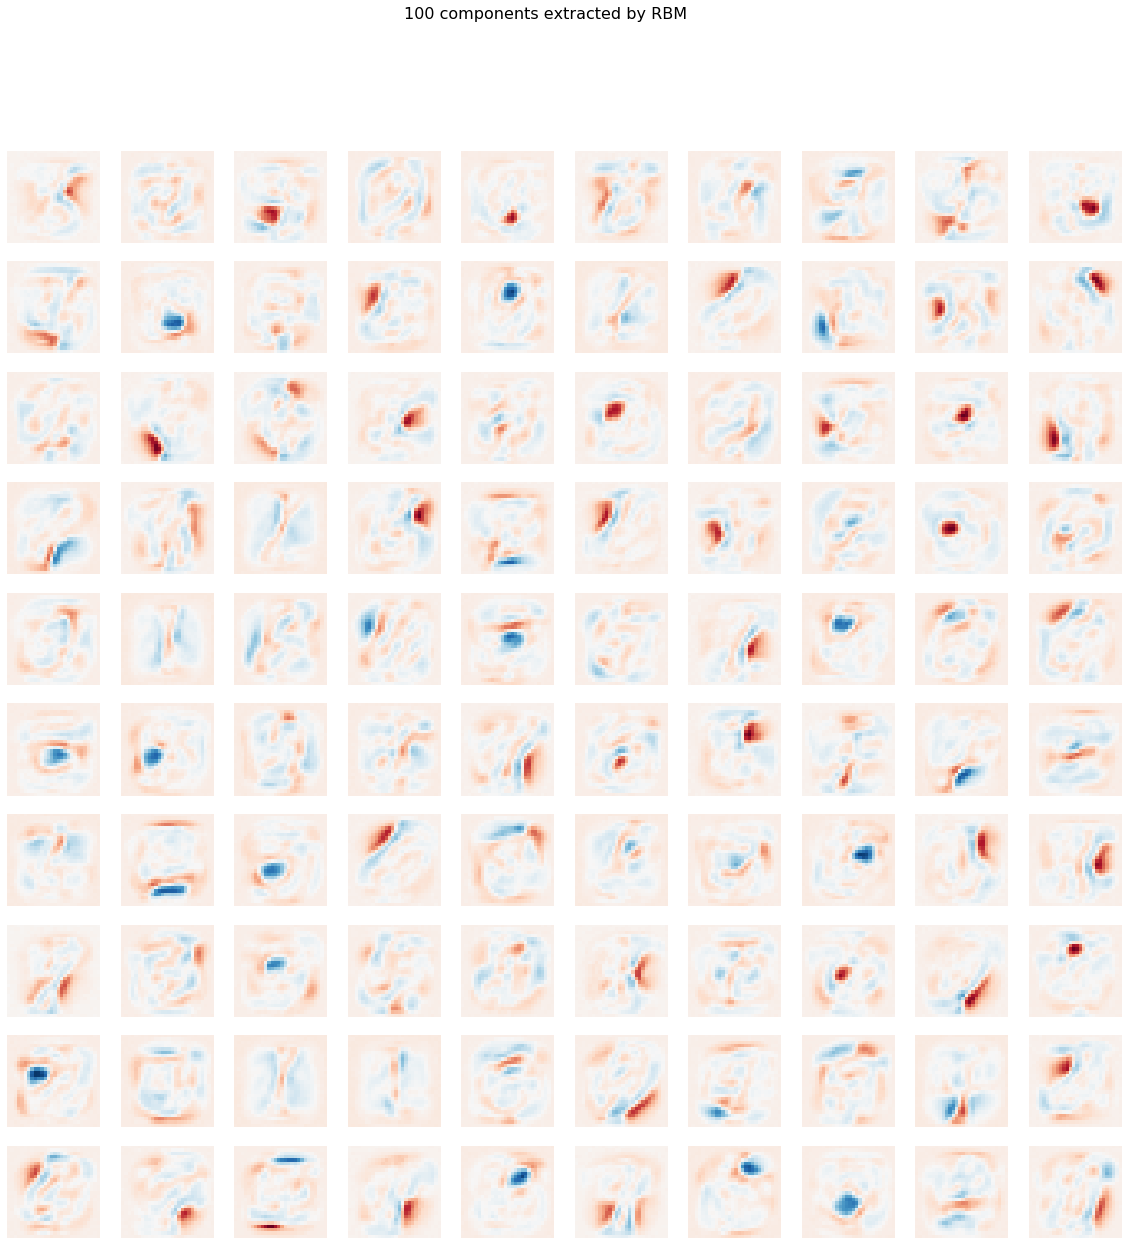

In [20]:
plt.figure(figsize=(20, 20))
for i, comp in enumerate(rbm.components_):
  plt.subplot(10, 10, i + 1)
  plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.RdBu,
             interpolation='nearest', vmin=-2.5, vmax=2.5)
  plt.axis('off')
  plt.suptitle('100 components extracted by RBM', fontsize=16)

### Źródło:
[https://www.kaggle.com/nicw102168/restricted-boltzmann-machine-rbm-on-mnist](https://www.kaggle.com/nicw102168/restricted-boltzmann-machine-rbm-on-mnist)